In [1]:
sizes = (100, 500, 1000, 5000, 10000, 50000, 100000)   # Размеры баз данных на вход

from dataclasses import dataclass

@dataclass(eq=False)
class Marriage:
    """
    Датакласс, отвечающий за инициализацию объектов типа Marriage.
    Инициализация происходит посредством передачи в конструктор класса параметров ниже.
    """
    groomName: str        # ФИО жениха
    groomBirthday: str    # Дата рождения жениха
    brideName: str        # ФИО невесты
    brideBirthday: str    # Дата рождения невесты
    marriageDate: str     # Дата свадьбы
    registryNumber: str   # Номер ЗАГСа
        
    def __gt__(self, other):
        """
        Перегрузка оператора ">" для сравнения объектов.
        Сравнение идёт сначала по имени жениха, затем по дате свадьбы, затем по номеру ЗАГСа.
        :param self: объект справа от оператора.
        :return: True, если self > other; False - в обратном случае.
        """
        if self.groomName > other.groomName:
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate > other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if int(self.registryNumber) > int(other.registryNumber):
                    return True
        return False
        
    def __lt__(self, other):
        """
        Перегрузка оператора "<" для сравнения объектов.
        Сравнение идёт сначала по имени жениха, затем по дате свадьбы, затем по номеру ЗАГСа.
        :param self: объект справа от оператора.
        :return: True, если self < other; False - в обратном случае.
        """
        if self.groomName < other.groomName:
            return True
        elif int(self.registryNumber) == int(other.registryNumber):
            if self.marriageDate < other.marriageDate:
                return True
            elif self.marriageDate == other.marriageDate:
                if int(self.registryNumber) < int(other.registryNumber):
                    return True
        return False
    
    def toStr(self):
        """
        Строковое представление объекта.
        :return: Строка с параметрами конструктора через пробел.
        """
        return ' '.join(self.__dict__.values())

def quickSort(data):
    """
    Алгоритм быстрой сортировки списка.
    :param data: Список объектов типа Marriage.
    :return: Отсортированный список объектов типа Marriage.
    """
    less, pivotList, more = [], [], []
    if len(data) <= 1:
        return data
    else:
        pivot = data[0]
        for i in data:
            if i < pivot:
                less.append(i)
            elif i > pivot:
                more.append(i)
            else:
                pivotList.append(i)
        less = quickSort(less)
        more = quickSort(more)
        return less + pivotList + more

# Предварительная сортировка данных для бинарного поиска
for size in sizes:
    db = open(f'databases/db{size}.txt')
    with open(f'search/sorted{size}.txt', 'w') as file:
        file.writelines(quickSort(db.readlines()))
    db.close()

# Словарь для списков отсортированных данных с указанием размеров
marriagesSorted = {}
for size in sizes:
    with open(f'search/sorted{size}.txt') as db:
        marriagesSorted[size] = [
            Marriage(
                groomName = ' '.join(line[:3]),
                groomBirthday = line[3],
                brideName = ' '.join(line[4:7]),
                brideBirthday = line[7],
                marriageDate = line[8],
                registryNumber = line[9]
            ) for line in map(lambda line: line.split(), db.readlines())
        ]

# Словарь для списков неотсортированных данных с указанием размеров
marriagesUnsorted = {}
for size in sizes:
    with open(f'databases/db{size}.txt') as db:
        marriagesUnsorted[size] = [
            Marriage(
                groomName = ' '.join(line[:3]),
                groomBirthday = line[3],
                brideName = ' '.join(line[4:7]),
                brideBirthday = line[7],
                marriageDate = line[8],
                registryNumber = line[9]
            ) for line in map(lambda line: line.split(), db.readlines())
        ]

def linearSearch(array, query):
    """
    Алгоритм прямого поиска объекта в списке.
    :param array: Список объектов типа Marriage.
    :param query: Объект типа Marriage, который нужно найти в этом списке.
    :return: Индекс требуемого объекта во входном списке; None, если такой объект найти не удалось.
    """
    for index, element in enumerate(array):
        if element == query: return index
    return None

def binarySearch(array, query):
    """
    Алгоритм бинарного поиска объекта в списке.
    :param array: Список объектов типа Marriage.
    :param query: Объект типа Marriage, который нужно найти в этом списке.
    :return: Индекс требуемого объекта во входном списке; None, если такой объект найти не удалось.
    """
    leftBound = 0
    rightBound = len(array) - 1
    middleBound = rightBound // 2
    while array[middleBound] != query and leftBound < rightBound:
        if query > array[middleBound]:
            leftBound = middleBound + 1
        else:
            rightBound = middleBound - 1
        middleBound = (leftBound+rightBound) // 2
    if leftBound > rightBound: 
        return None
    else: 
        return middleBound

In [2]:
import numpy as np
from time import time

"""
Выполнение непосредственной задачи - поиск и сравнение скоростей разных его видов.
"""

timing = {'Прямой поиск': [], 'Бинарный поиск': [], 'Сортировка и бинарный поиск': [], 'Поиск по ключу': []}
for size in sizes:
    sortedCopy = marriagesSorted[size].copy()
    
    # Случайно выбираем объект для поиска
    randomMarriage = sortedCopy[np.random.randint(size)]
    print(f'\nРазмер: {size}.\tЗапись:', randomMarriage.toStr())
    
    # Счётчики времени различных видов поиска
    linearTime, binaryTime, keyTime = 0, 0, 0
    
    # Находим среднее время прямого и бинарного поисков по 500 попыткам
    for _ in range(500):
        check = time()
        linearSearch(sortedCopy, randomMarriage)
        linearTime += time() - check

        check = time()
        binarySearch(sortedCopy, randomMarriage)
        binaryTime += time() - check
    
    linearTime *= 2e3
    print('Прямой поиск.\t\t\tНомер записи:', linearSearch(sortedCopy, randomMarriage), end='.\t')
    print('Время поиска (мкс):', linearTime)
    timing['Прямой поиск'].append(linearTime)
    
    print('Бинарный поиск.\t\t\tНомер записи:', binarySearch(sortedCopy, randomMarriage), end='.\t')
    binaryTime *= 2e3
    print('Время поиска (мкс):', binaryTime)
    timing['Бинарный поиск'].append(binaryTime)
    
    unsortedCopy = marriagesUnsorted[size].copy()
    check = time()
    binarySearch(quickSort(unsortedCopy), randomMarriage)
    check = (time() - check) * 1e6
    print(f'Сортировка и бинарный поиск.\t\t\t\tВремя поиска (мкс): {check}')
    timing['Сортировка и бинарный поиск'].append(check)
    
    # Словарь для поиска по ключу
    multimap = dict(zip(map(lambda obj: obj.toStr(), unsortedCopy), unsortedCopy))
    
    # Находим среднее время поиска по ключу по 3000 попыткам
    for _ in range(3000):
        check = time()
        multimap[randomMarriage.toStr()]
        keyTime += time() - check
    
    keyTime *= 1e3/3
    print(f'Поиск по ключу.\t\t\t\t\t\tВремя поиска (мкс): {keyTime}')
    timing['Поиск по ключу'].append(keyTime)


Размер: 100.	Запись: Орехов Фрол Жанович 1985-06-06 Козлова Марфа Мироновна 1993-12-20 2020-01-12 71
Прямой поиск.			Номер записи: 70.	Время поиска (мкс): 7.978916168212891
Бинарный поиск.			Номер записи: 70.	Время поиска (мкс): 3.9887428283691406
Сортировка и бинарный поиск.				Время поиска (мкс): 997.3049163818359
Поиск по ключу.						Время поиска (мкс): 0.6648699442545573

Размер: 500.	Запись: Вишняков Степан Ярославович 1989-10-08 Авдеева Ангелина Васильевна 1984-04-04 2020-01-02 325
Прямой поиск.			Номер записи: 52.	Время поиска (мкс): 9.973526000976562
Бинарный поиск.			Номер записи: 52.	Время поиска (мкс): 3.9892196655273438
Сортировка и бинарный поиск.				Время поиска (мкс): 1994.8482513427734
Поиск по ключу.						Время поиска (мкс): 0.33251444498697913

Размер: 1000.	Запись: Евсеев Любим Владленович 1991-09-14 Чернова Оксана Алексеевна 1989-04-03 2020-01-22 89
Прямой поиск.			Номер записи: 257.	Время поиска (мкс): 37.89854049682617
Бинарный поиск.			Номер записи: 257.	Время п

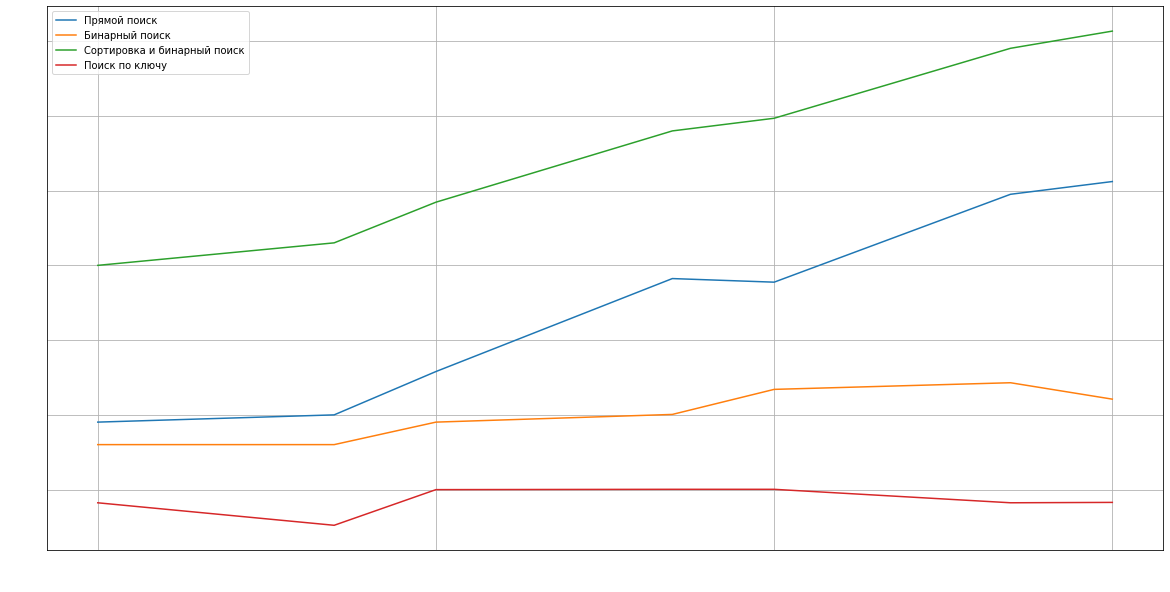

In [5]:
from matplotlib import pyplot as plt
plt.rc(('xtick', 'ytick'), color='white')
plt.figure(figsize=(20, 10))
plt.plot(sizes, timing['Прямой поиск'], label='Прямой поиск')
plt.plot(sizes, timing['Бинарный поиск'], label='Бинарный поиск')
plt.plot(sizes, timing['Сортировка и бинарный поиск'], label='Сортировка и бинарный поиск')
plt.plot(sizes, timing['Поиск по ключу'], label='Поиск по ключу')
plt.grid()
plt.legend()
plt.xlabel('Объём входных данных', color='white')
plt.ylabel('Время поиска, мкс', color='white')
plt.xscale('log')
plt.yscale('log')
plt.savefig('lab2_search_timing.pdf')